**Genetic Algorithm for Hyperparameter tuning**


Concept : GA tries to recreate natural selection but for parameter option instead, to try and find the solution that would give the best output for certain tasks, populate, reproduce, mutate, until the most optimized solution is found.

**Problem Statement:** Given a set of $n$ items, each with weight $w_i$ and value $v_i$, select a subset of items to maximize the total value, subject to the constraint that the total weight does not exceed a given capacity $W$.

\begin{align*}
    &\text{Maximize:} \quad V = \sum_{i=1}^{n} x_i v_i \\
    &\text{Subject to:} \quad \sum_{i=1}^{n} x_i w_i \leq W \\
    &x_i \in \{0, 1\} \quad \forall i
\end{align*}



**GA Operators:**

*   **Selection:** Tournament selection chooses the best among randomly sampled individuals.
*   **Crossover:** Single-point crossover combines two parents at a random point to produce two children.
*   **Mutation:** Bit-flip mutation inverts bits in the chromosome with a small probability.
*   **Elitism:** The best individual from a generation is carried forward to the next.



In [ ]:
import pandas as pd

items = [
    (0, 2, 3, 1.50),
    (1, 3, 4, 1.33),
    (2, 4, 5, 1.25),
    (3, 5, 6, 1.20),
    (4, 1, 2, 2.00),
    (5, 6, 9, 1.50),
    (6, 7, 10, 1.43),
    (7, 8, 12, 1.50),
    (8, 2, 4, 2.00),
    (9, 3, 6, 2.00)
]

df = pd.DataFrame(items, columns=["Item", "Weight ($w_i$)", "Value ($v_i$)", "$v_i / w_i$"])
df

,Item,Weight ($w_i$),Value ($v_i$),$v_i / w_i$
0,0,2,3,1.50
1,1,3,4,1.33
2,2,4,5,1.25
3,3,5,6,1.20
4,4,1,2,2.00
5,5,6,9,1.50
6,6,7,10,1.43
7,7,8,12,1.50
8,8,2,4,2.00
9,9,3,6,2.00


KNAPSACK PROBLEM WITH GENETIC ALGORITHM
Available Items:
Item | Weight | Value | Value/Weight Ratio
---------------------------------------------
   0 |      2 |     3 |          1.50
   1 |      3 |     4 |          1.33
   2 |      4 |     5 |          1.25
   3 |      5 |     6 |          1.20
   4 |      1 |     2 |          2.00
   5 |      6 |     9 |          1.50
   6 |      7 |    10 |          1.43
   7 |      8 |    12 |          1.50
   8 |      2 |     4 |          2.00
   9 |      3 |     6 |          2.00

Knapsack Capacity: 15
Total Available Items: 10

Starting Genetic Algorithm Evolution...
--------------------------------------------------
Generation 0: Best=25.00, Avg=4.50
Generation 20: Best=25.00, Avg=22.95
Generation 40: Best=25.00, Avg=21.83
Generation 60: Best=25.00, Avg=22.49
Generation 80: Best=25.00, Avg=20.98
Generation 100: Best=25.00, Avg=21.54
Generation 120: Best=25.00, Avg=22.25
Generation 140: Best=25.00, Avg=22.78
Generation 160: Best=25.00, Avg=21.8

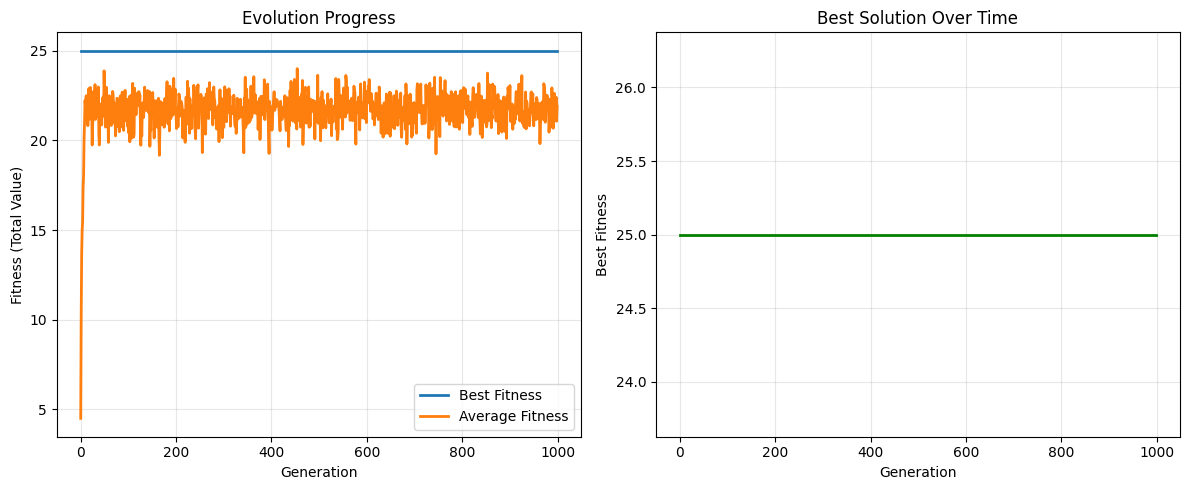


COMPARISON WITH BRUTE FORCE SOLUTION
--------------------------------------------------
GA Solution Value: 25
Optimal Value: 25
GA Efficiency: 100.0%
GA found the optimal solution!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from typing import List, Tuple

class KnapsackGA:
    def __init__(self, items: List[Tuple[int, int]], max_weight: int,
                 population_size: int = 50, generations: int = 100,
                 mutation_rate: float = 0.01, crossover_rate: float = 0.8):
        """
        Initialize Knapsack Genetic Algorithm

        Args:
            items: List of (weight, value) tuples
            max_weight: Maximum weight capacity of knapsack
            population_size: Number of individuals in population
            generations: Number of generations to evolve
            mutation_rate: Probability of mutation
            crossover_rate: Probability of crossover
        """
        self.items = items
        self.max_weight = max_weight
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.num_items = len(items)

        # Track evolution progress
        self.best_fitness_history = []
        self.avg_fitness_history = []
        self.best_solution = None
        self.best_fitness = 0

    def create_individual(self) -> List[int]:
        """Create a random individual (binary string representing item selection)"""
        return [random.randint(0, 1) for _ in range(self.num_items)]

    def create_population(self) -> List[List[int]]:
        """Create initial population"""
        return [self.create_individual() for _ in range(self.population_size)]

    def calculate_fitness(self, individual: List[int]) -> float:
        """
        Calculate fitness of an individual
        Fitness = total value if weight <= max_weight, else penalized
        """
        total_weight = sum(individual[i] * self.items[i][0] for i in range(self.num_items))
        total_value = sum(individual[i] * self.items[i][1] for i in range(self.num_items))

        # If weight exceeds capacity, apply heavy penalty
        if total_weight > self.max_weight:
            return 0  # Invalid solution

        return total_value

    def tournament_selection(self, population: List[List[int]], tournament_size: int = 3) -> List[int]:
        """Select parent using tournament selection"""
        tournament = random.sample(population, tournament_size)
        return max(tournament, key=self.calculate_fitness)

    def crossover(self, parent1: List[int], parent2: List[int]) -> Tuple[List[int], List[int]]:
        """Single-point crossover"""
        if random.random() > self.crossover_rate:
            return parent1.copy(), parent2.copy()

        crossover_point = random.randint(1, self.num_items - 1)

        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]

        return child1, child2

    def mutate(self, individual: List[int]) -> List[int]:
        """Bit-flip mutation"""
        mutated = individual.copy()
        for i in range(self.num_items):
            if random.random() < self.mutation_rate:
                mutated[i] = 1 - mutated[i]  # Flip bit
        return mutated

    def evolve(self) -> Tuple[List[int], float]:
        """Main evolution loop"""
        population = self.create_population()

        for generation in range(self.generations):
            # Calculate fitness for all individuals
            fitness_scores = [self.calculate_fitness(ind) for ind in population]

            # Track statistics
            best_gen_fitness = max(fitness_scores)
            avg_gen_fitness = sum(fitness_scores) / len(fitness_scores)

            self.best_fitness_history.append(best_gen_fitness)
            self.avg_fitness_history.append(avg_gen_fitness)

            # Update best solution
            if best_gen_fitness > self.best_fitness:
                self.best_fitness = best_gen_fitness
                best_idx = fitness_scores.index(best_gen_fitness)
                self.best_solution = population[best_idx].copy()

            # Print progress
            if generation % 20 == 0:
                print(f"Generation {generation}: Best={best_gen_fitness:.2f}, Avg={avg_gen_fitness:.2f}")

            # Create next generation
            new_population = []

            # Elitism: Keep best individual
            best_idx = fitness_scores.index(max(fitness_scores))
            new_population.append(population[best_idx].copy())

            # Generate rest of population
            while len(new_population) < self.population_size:
                parent1 = self.tournament_selection(population)
                parent2 = self.tournament_selection(population)

                child1, child2 = self.crossover(parent1, parent2)

                child1 = self.mutate(child1)
                child2 = self.mutate(child2)

                new_population.extend([child1, child2])

            # Trim to exact population size
            population = new_population[:self.population_size]

        return self.best_solution, self.best_fitness

    def print_solution(self):
        """Print the best solution found"""
        if self.best_solution is None:
            print("No solution found. Run evolve() first.")
            return

        print("\n" + "="*50)
        print("BEST SOLUTION FOUND")
        print("="*50)

        total_weight = 0
        total_value = 0
        selected_items = []

        for i, selected in enumerate(self.best_solution):
            if selected:
                weight, value = self.items[i]
                total_weight += weight
                total_value += value
                selected_items.append((i, weight, value))

        print(f"Total Value: {total_value}")
        print(f"Total Weight: {total_weight}/{self.max_weight}")
        print(f"Weight Utilization: {total_weight/self.max_weight*100:.1f}%")
        print("\nSelected Items:")
        print("Item | Weight | Value | Value/Weight Ratio")
        print("-" * 45)

        for item_idx, weight, value in selected_items:
            ratio = value / weight if weight > 0 else 0
            print(f"{item_idx:4d} | {weight:6d} | {value:5d} | {ratio:13.2f}")

    def plot_evolution(self):
        """Plot the evolution progress"""
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(self.best_fitness_history, label='Best Fitness', linewidth=2)
        plt.plot(self.avg_fitness_history, label='Average Fitness', linewidth=2)
        plt.xlabel('Generation')
        plt.ylabel('Fitness (Total Value)')
        plt.title('Evolution Progress')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.subplot(1, 2, 2)
        plt.plot(self.best_fitness_history, 'g-', linewidth=2)
        plt.xlabel('Generation')
        plt.ylabel('Best Fitness')
        plt.title('Best Solution Over Time')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# Example usage and demonstration
def run_knapsack_example():
    """Run a complete example of the knapsack problem"""

    print("KNAPSACK PROBLEM WITH GENETIC ALGORITHM")
    print("="*60)

    # Define items: (weight, value)
    items = [
        (2, 3),   # Item 0: weight=2, value=3
        (3, 4),   # Item 1: weight=3, value=4
        (4, 5),   # Item 2: weight=4, value=5
        (5, 6),   # Item 3: weight=5, value=6
        (1, 2),   # Item 4: weight=1, value=2
        (6, 9),   # Item 5: weight=6, value=9
        (7, 10),  # Item 6: weight=7, value=10
        (8, 12),  # Item 7: weight=8, value=12
        (2, 4),   # Item 8: weight=2, value=4
        (3, 6),   # Item 9: weight=3, value=6
    ]

    max_weight = 15

    print("Available Items:")
    print("Item | Weight | Value | Value/Weight Ratio")
    print("-" * 45)
    for i, (weight, value) in enumerate(items):
        ratio = value / weight if weight > 0 else 0
        print(f"{i:4d} | {weight:6d} | {value:5d} | {ratio:13.2f}")

    print(f"\nKnapsack Capacity: {max_weight}")
    print(f"Total Available Items: {len(items)}")

    # Create and run GA
    ga = KnapsackGA(
        items=items,
        max_weight=max_weight,
        population_size=100,
        generations=1000,
        mutation_rate=0.02,
        crossover_rate=0.8
    )

    print("\nStarting Genetic Algorithm Evolution...")
    print("-" * 50)

    best_solution, best_fitness = ga.evolve()

    # Print results
    ga.print_solution()

    # Plot evolution
    ga.plot_evolution()

    # Compare with brute force (for small problems)
    print("\nCOMPARISON WITH BRUTE FORCE SOLUTION")
    print("-" * 50)

    def brute_force_knapsack(items, max_weight):
        """Find optimal solution using brute force"""
        n = len(items)
        best_value = 0
        best_combination = None

        # Try all possible combinations
        for i in range(2**n):
            combination = []
            total_weight = 0
            total_value = 0

            for j in range(n):
                if (i >> j) & 1:
                    combination.append(1)
                    total_weight += items[j][0]
                    total_value += items[j][1]
                else:
                    combination.append(0)

            if total_weight <= max_weight and total_value > best_value:
                best_value = total_value
                best_combination = combination

        return best_combination, best_value

    optimal_solution, optimal_value = brute_force_knapsack(items, max_weight)

    print(f"GA Solution Value: {best_fitness}")
    print(f"Optimal Value: {optimal_value}")
    print(f"GA Efficiency: {(best_fitness/optimal_value)*100:.1f}%")

    if best_fitness == optimal_value:
        print("GA found the optimal solution!")
    else:
        print("GA found a good solution, but not optimal. Try:")
        print("   - Increasing population size")
        print("   - More generations")
        print("   - Different crossover/mutation rates")

# Run the example
if __name__ == "__main__":
    run_knapsack_example()

**Small test**

# Genetic Algorithm Hyperparameter Tuning for ML (Wine Dataset)

## Problem Setup

- **Training Dataset:** [Wine dataset (UCI ML Repository)](https://archive.ics.uci.edu/ml/datasets/wine)
- **Model types tuned:** Random Forest, SVM, MLP Neural Network
- **Target:** Predict wine class (multiclass classification)

## Genetic Algorithm (GA) Details

- **Fitness Score:** Accuracy (mean cross-validation accuracy during training)
- **Parameters Tuned:**
  - *Random Forest*: `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`
  - *SVM*: `C`, `gamma`, `degree`, `kernel`
  - *Neural Network*: `hidden_layer_sizes`, `learning_rate_init`, `alpha`, `max_iter`, `activation`
- **GA Operators:**
  - *Initialization*: Random population of hyperparameter sets
  - *Selection*: Tournament selection
  - *Crossover*: Arithmetic crossover (for continuous) or single-point (for discrete)
  - *Mutation*: Gaussian mutation (for continuous) or random bit flip (for discrete)
  - *Elitism*: Top-performing individuals preserved for next generation


In [ ]:
!pip install ucimlrepo scikit-learn pandas matplotlib seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from typing import List, Tuple, Dict, Any
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Fetch the ISOLET dataset (current ID: 54)
isolet = fetch_ucirepo(id=54)

# Extract features and targets
X = isolet.data.features
y = isolet.data.targets

# ISOLET targets are usually a single column DataFrame; flatten if needed
if hasattr(y, 'values'):
    y = y.values.ravel()

print("Shape of X:", X.shape)   # Expect (7797, 617)
print("Shape of y:", y.shape)   # Expect (7797,)
print("Classes:", np.unique(y))

Shape of X: (7797, 617)
Shape of y: (7797,)
Classes: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26.]


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute608,Attribute609,Attribute610,Attribute611,Attribute612,Attribute613,Attribute614,Attribute615,Attribute616,Attribute617
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,...,0.3334,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,...,0.2272,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,...,0.0952,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,...,0.0648,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,...,0.2812,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500


Target class distribution:
1.0     300
2.0     300
3.0     300
4.0     300
5.0     300
7.0     300
9.0     300
8.0     300
10.0    300
11.0    300
23.0    300
12.0    300
14.0    300
15.0    300
17.0    300
16.0    300
18.0    300
19.0    300
25.0    300
20.0    300
21.0    300
22.0    300
26.0    300
24.0    300
13.0    299
6.0     298
Name: count, dtype: int64


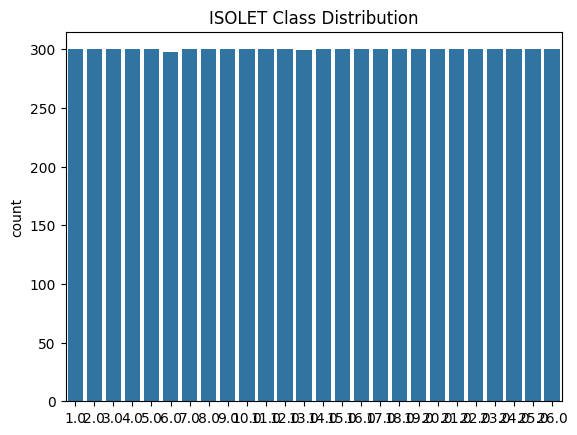

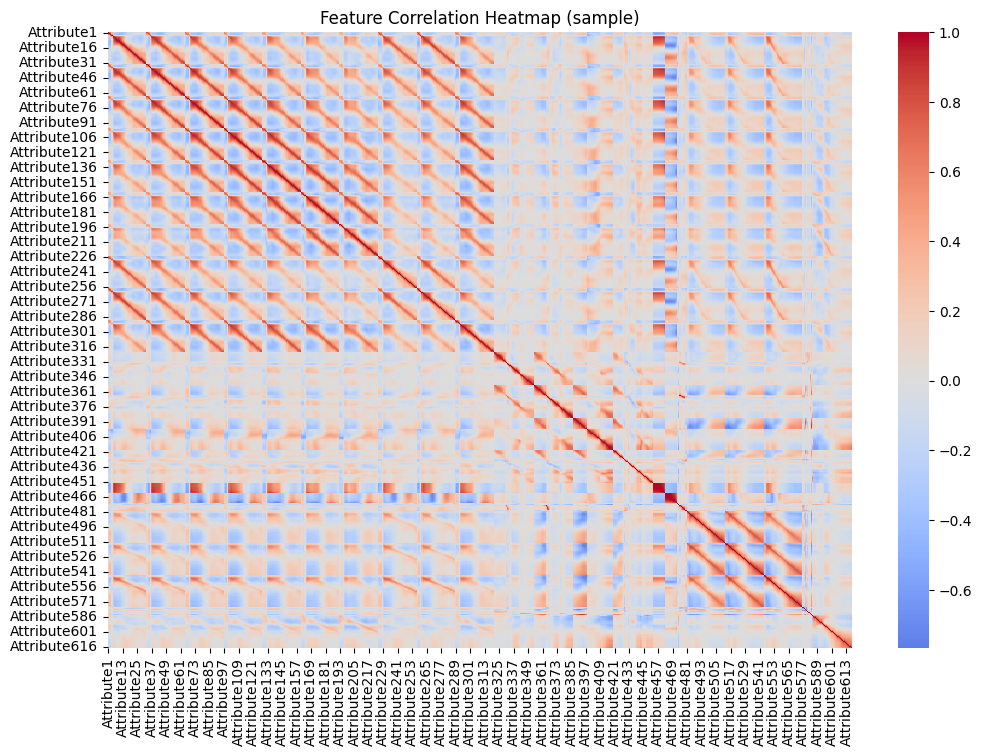

In [ ]:
display(X.head())
print("Target class distribution:")
print(pd.Series(y).value_counts())

sns.countplot(x=y)
plt.title("ISOLET Class Distribution")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap (sample)")
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Impute missing values in ISOLET
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Proceed with train-test split, scaling, PCA, etc.
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.1, random_state=42, stratify=y
)

# Feature selection: Keep top 200 features (you can adjust 'k'!)
selector = SelectKBest(score_func=f_classif, k=500)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

print("Training set shape after feature selection:", X_train_scaled.shape)
print("Test set shape after feature selection:", X_test_scaled.shape)

pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Training set shape after feature selection: (7017, 500)
Test set shape after feature selection: (780, 500)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('select', SelectKBest(score_func=f_classif)),
    ('model', RandomForestClassifier())
])
param_grid = {'select__k': [20, 50, 100, 200, 300, 400, 500, 600]}
grid = GridSearchCV(pipe, param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best number of features:", grid.best_params_['select__k'])

Best number of features: 600


In [ ]:
import time

class MLHyperparameterGA:
    def __init__(self, X_train, X_test, y_train, y_test, model_type='random_forest',
                 population_size=30, generations=50, mutation_rate=0.1, crossover_rate=0.8):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.model_type = model_type
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

        # Define hyperparameter spaces for different models
        self.param_spaces = {
            'random_forest': {
                'n_estimators': (10, 200),
                'max_depth': (3, 20),
                'min_samples_split': (2, 20),
                'min_samples_leaf': (1, 10),
                'max_features': (0.1, 1.0)
            },
            'svm': {
                'C': (0.1, 100.0),
                'gamma': (0.001, 1.0),
                'degree': (2, 5),
                'kernel_type': (0, 2)
            },
            'neural_network': {
                'hidden_layer_sizes': (50, 300),
                'learning_rate': (0.001, 0.1),
                'alpha': (0.0001, 0.01),
                'max_iter': (100, 500),
                'activation': (0, 2)
            }
        }

        # List of integer parameters per model
        self.int_params = {
            'random_forest': ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'],
            'svm': ['degree', 'kernel_type'],
            'neural_network': ['hidden_layer_sizes', 'max_iter', 'activation']
        }

        self.best_fitness_history = []
        self.avg_fitness_history = []
        self.best_params_history = []
        self.best_individual = None
        self.best_fitness = 0

    def evolve(self) -> Tuple[Dict[str, Any], float]:
        start_time = time.time()
        print(f"Starting GA Hyperparameter Optimization for {self.model_type.upper()}")
        print(f"Population Size: {self.population_size}, Generations: {self.generations}")
        print("-" * 60)
        population = [self.create_individual() for _ in range(self.population_size)]
        for generation in range(self.generations):
            fitness_scores = []
            for individual in population:
                fitness = self.calculate_fitness(individual)
                fitness_scores.append(fitness)
            best_gen_fitness = max(fitness_scores)
            avg_gen_fitness = sum(fitness_scores) / len(fitness_scores)
            self.best_fitness_history.append(best_gen_fitness)
            self.avg_fitness_history.append(avg_gen_fitness)
            if best_gen_fitness > self.best_fitness:
                self.best_fitness = best_gen_fitness
                best_idx = fitness_scores.index(best_gen_fitness)
                self.best_individual = population[best_idx].copy()
                best_params = self.decode_individual(self.best_individual)
                self.best_params_history.append(best_params)
            if generation % 10 == 0 or generation == self.generations - 1:
                print(f"Gen {generation:3d}: Best={best_gen_fitness:.4f}, Avg={avg_gen_fitness:.4f}, "
                      f"Std={np.std(fitness_scores):.4f}")
            new_population = []
            elite_size = max(1, self.population_size // 10)
            elite_indices = sorted(range(len(fitness_scores)),
                                   key=lambda i: fitness_scores[i], reverse=True)[:elite_size]
            for idx in elite_indices:
                new_population.append(population[idx].copy())
            while len(new_population) < self.population_size:
                parent1 = self.tournament_selection(population, fitness_scores)
                parent2 = self.tournament_selection(population, fitness_scores)
                child1, child2 = self.arithmetic_crossover(parent1, parent2)
                child1 = self.gaussian_mutation(child1)
                child2 = self.gaussian_mutation(child2)
                new_population.extend([child1, child2])
            population = new_population[:self.population_size]

        best_params = self.decode_individual(self.best_individual)
        end_time = time.time()
        total_runtime = end_time - start_time
        print(f"Total GA runtime: {total_runtime:.2f} seconds")

        # Save results to a .txt file
        with open("GA_results.txt", "w") as f:
            f.write(f"Total GA runtime: {total_runtime:.2f} seconds\n")
            f.write(f"Best parameters: {best_params}\n")
            f.write(f"Best fitness (cross-val accuracy): {self.best_fitness:.4f}\n")
            f.write(f"Generations: {self.generations}\n")
            f.write(f"Population size: {self.population_size}\n")
            f.write(f"Mutation rate: {self.mutation_rate}\n")
            f.write(f"Crossover rate: {self.crossover_rate}\n")

        return best_params, self.best_fitness

    def create_individual(self) -> List[float]:
        param_space = self.param_spaces[self.model_type]
        individual = []
        for param_name, (min_val, max_val) in param_space.items():
            if param_name in self.int_params[self.model_type]:
                individual.append(random.randint(int(min_val), int(max_val)))
            else:
                individual.append(random.uniform(min_val, max_val))
        return individual

    def decode_individual(self, individual: List[float]) -> Dict[str, Any]:
        param_space = self.param_spaces[self.model_type]
        params = {}
        if individual is None or len(individual) != len(param_space):
            return {}  # Defensive check

        for i, (param_name, _) in enumerate(param_space.items()):
            if self.model_type == 'random_forest':
                if param_name in self.int_params['random_forest']:
                    params[param_name] = int(individual[i])
                else:
                    params[param_name] = individual[i]
            elif self.model_type == 'svm':
                if param_name == 'kernel_type':
                    kernels = ['rbf', 'poly', 'linear']
                    params['kernel'] = kernels[int(individual[i])]
                elif param_name in self.int_params['svm']:
                    params[param_name] = int(individual[i])
                else:
                    params[param_name] = individual[i]
            elif self.model_type == 'neural_network':
                if param_name == 'hidden_layer_sizes':
                    params['hidden_layer_sizes'] = (int(individual[i]),)
                elif param_name == 'activation':
                    activations = ['relu', 'tanh', 'logistic']
                    params['activation'] = activations[int(individual[i])]
                elif param_name in self.int_params['neural_network']:
                    params[param_name] = int(individual[i])
                else:
                    if param_name == 'learning_rate':
                        params['learning_rate_init'] = individual[i]
                    else:
                        params[param_name] = individual[i]
        return params

    def create_model(self, params: Dict[str, Any]):
        if self.model_type == 'random_forest':
            return RandomForestClassifier(**params, random_state=42, n_jobs=-1)
        elif self.model_type == 'svm':
            return SVC(**params, random_state=42)
        elif self.model_type == 'neural_network':
            return MLPClassifier(**params, random_state=42)

    def calculate_fitness(self, individual: List[float]) -> float:
        try:
            params = self.decode_individual(individual)
            model = self.create_model(params)
            cv_scores = cross_val_score(model, self.X_train, self.y_train, cv=3, scoring='accuracy')
            fitness = np.mean(cv_scores)
            return fitness
        except Exception as e:
            return 0.0

    def tournament_selection(self, population: List[List[float]], fitness_scores: List[float],
                            tournament_size: int = 3) -> List[float]:
        tournament_indices = random.sample(range(len(population)), tournament_size)
        tournament_fitness = [fitness_scores[i] for i in tournament_indices]
        winner_idx = tournament_indices[tournament_fitness.index(max(tournament_fitness))]
        return population[winner_idx].copy()

    def arithmetic_crossover(self, parent1: List[float], parent2: List[float]) -> Tuple[List[float], List[float]]:
        if random.random() > self.crossover_rate:
            return parent1.copy(), parent2.copy()
        alpha = random.random()
        child1 = []
        child2 = []
        for i in range(len(parent1)):
            child1.append(alpha * parent1[i] + (1 - alpha) * parent2[i])
            child2.append(alpha * parent2[i] + (1 - alpha) * parent1[i])
        return child1, child2

    def gaussian_mutation(self, individual: List[float]) -> List[float]:
        mutated = individual.copy()
        param_space = self.param_spaces[self.model_type]
        for i, (param_name, (min_val, max_val)) in enumerate(param_space.items()):
            if random.random() < self.mutation_rate:
                noise = np.random.normal(0, (max_val - min_val) * 0.1)
                mutated[i] = np.clip(mutated[i] + noise, min_val, max_val)
                if param_name in self.int_params[self.model_type]:
                    mutated[i] = int(mutated[i])
        return mutated

    def evolve(self) -> Tuple[Dict[str, Any], float]:
        print(f"Starting GA Hyperparameter Optimization for {self.model_type.upper()}")
        print(f"Population Size: {self.population_size}, Generations: {self.generations}")
        print("-" * 60)
        population = [self.create_individual() for _ in range(self.population_size)]
        for generation in range(self.generations):
            fitness_scores = []
            for individual in population:
                fitness = self.calculate_fitness(individual)
                fitness_scores.append(fitness)
            best_gen_fitness = max(fitness_scores)
            avg_gen_fitness = sum(fitness_scores) / len(fitness_scores)
            self.best_fitness_history.append(best_gen_fitness)
            self.avg_fitness_history.append(avg_gen_fitness)
            if best_gen_fitness > self.best_fitness:
                self.best_fitness = best_gen_fitness
                best_idx = fitness_scores.index(best_gen_fitness)
                self.best_individual = population[best_idx].copy()
                best_params = self.decode_individual(self.best_individual)
                self.best_params_history.append(best_params)
            if generation % 10 == 0 or generation == self.generations - 1:
                print(f"Gen {generation:3d}: Best={best_gen_fitness:.4f}, Avg={avg_gen_fitness:.4f}, "
                      f"Std={np.std(fitness_scores):.4f}")
            new_population = []
            elite_size = max(1, self.population_size // 10)
            elite_indices = sorted(range(len(fitness_scores)),
                                   key=lambda i: fitness_scores[i], reverse=True)[:elite_size]
            for idx in elite_indices:
                new_population.append(population[idx].copy())
            while len(new_population) < self.population_size:
                parent1 = self.tournament_selection(population, fitness_scores)
                parent2 = self.tournament_selection(population, fitness_scores)
                child1, child2 = self.arithmetic_crossover(parent1, parent2)
                child1 = self.gaussian_mutation(child1)
                child2 = self.gaussian_mutation(child2)
                new_population.extend([child1, child2])
            population = new_population[:self.population_size]
        best_params = self.decode_individual(self.best_individual)
        return best_params, self.best_fitness

    def evaluate_best_model(self, best_params: Dict[str, Any]):
        print("\n" + "="*60)
        print("BEST MODEL EVALUATION")
        print("="*60)
        best_model = self.create_model(best_params)
        best_model.fit(self.X_train, self.y_train)
        train_pred = best_model.predict(self.X_train)
        test_pred = best_model.predict(self.X_test)
        train_accuracy = accuracy_score(self.y_train, train_pred)
        test_accuracy = accuracy_score(self.y_test, test_pred)
        print(f"Best Parameters Found:")
        for param, value in best_params.items():
            print(f"  {param}: {value}")
        print(f"\nCross-Validation Accuracy: {self.best_fitness:.4f}")
        print(f"Training Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"\nDetailed Classification Report:")
        print(classification_report(self.y_test, test_pred))
        return best_model, test_accuracy

    def plot_evolution(self):
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes[0, 0].plot(self.best_fitness_history, 'g-', linewidth=2, label='Best Fitness')
        axes[0, 0].plot(self.avg_fitness_history, 'b-', linewidth=2, label='Average Fitness')
        axes[0, 0].set_xlabel('Generation')
        axes[0, 0].set_ylabel('Fitness (CV Accuracy)')
        axes[0, 0].set_title('Evolution Progress')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        axes[0, 1].plot(self.best_fitness_history, 'g-', linewidth=2)
        axes[0, 1].set_xlabel('Generation')
        axes[0, 1].set_ylabel('Best Fitness')
        axes[0, 1].set_title('Best Solution Over Time')
        axes[0, 1].grid(True, alpha=0.3)
        if len(self.best_fitness_history) > 0:
            axes[1, 0].hist(self.best_fitness_history[-10:], bins=10, alpha=0.7, edgecolor='black')
            axes[1, 0].set_xlabel('Fitness')
            axes[1, 0].set_ylabel('Frequency')
            axes[1, 0].set_title('Final Generation Fitness Distribution')
            axes[1, 0].grid(True, alpha=0.3)
        if len(self.best_fitness_history) > 10:
            convergence = [abs(self.best_fitness_history[i] - self.best_fitness_history[i-1])
                           for i in range(1, len(self.best_fitness_history))]
            axes[1, 1].plot(convergence, 'r-', linewidth=2)
            axes[1, 1].set_xlabel('Generation')
            axes[1, 1].set_ylabel('Fitness Change')
            axes[1, 1].set_title('Convergence Analysis')
            axes[1, 1].grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

def load_wine_dataset():
    print("Loading Dataset from UCI ML Repository...")
    wine = fetch_ucirepo(id=109)
    X = wine.data.features
    y = wine.data.targets
    if hasattr(y, 'values'):
        y = y.values.ravel()
    print(f"Dataset shape: {X.shape}")
    print(f"Number of classes: {len(np.unique(y))}")
    print(f"Class distribution: {np.bincount(y)}")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print(f"Training set: {X_train_scaled.shape}")
    print(f"Test set: {X_test_scaled.shape}")
    return X_train_scaled, X_test_scaled, y_train, y_test

def compare_models():
    print("COMPREHENSIVE MODEL COMPARISON WITH GA OPTIMIZATION")
    print("="*70)
    X_train, X_test, y_train, y_test = load_wine_dataset()
    models = ['random_forest', 'svm', 'neural_network']
    results = {}
    for model_type in models:
        print(f"\n{'='*20} {model_type.upper()} {'='*20}")
        ga = MLHyperparameterGA(
            X_train=X_train,
            X_test=X_test,
            y_train=y_train,
            y_test=y_test,
            model_type=model_type,
            population_size=30,
            generations=50,
            mutation_rate=0.1,
            crossover_rate=0.8
        )
        best_params, best_fitness = ga.evolve()
        best_model, test_accuracy = ga.evaluate_best_model(best_params)
        results[model_type] = {
            'best_params': best_params,
            'cv_accuracy': best_fitness,
            'test_accuracy': test_accuracy,
            'ga_optimizer': ga
        }
        ga.plot_evolution()
    print("\n" + "="*70)
    print("FINAL COMPARISON")
    print("="*70)
    for model_type, result in results.items():
        print(f"\n{model_type.upper()}:")
        print(f"  CV Accuracy: {result['cv_accuracy']:.4f}")
        print(f"  Test Accuracy: {result['test_accuracy']:.4f}")
    best_model_type = max(results.keys(), key=lambda k: results[k]['test_accuracy'])
    print(f"\nWINNER: {best_model_type.upper()} with {results[best_model_type]['test_accuracy']:.4f} test accuracy")
    return results

Starting GA Hyperparameter Optimization for RANDOM_FOREST
Population Size: 30, Generations: 15
------------------------------------------------------------
Gen   0: Best=0.9161, Avg=0.8114, Std=0.0659
Gen  10: Best=0.9201, Avg=0.9183, Std=0.0013
Gen  14: Best=0.9201, Avg=0.9190, Std=0.0022

BEST MODEL EVALUATION
Best Parameters Found:
  n_estimators: 193
  max_depth: 17
  min_samples_split: 5
  min_samples_leaf: 2
  max_features: 0.10554918528752913

Cross-Validation Accuracy: 0.9201
Training Accuracy: 1.0000
Test Accuracy: 0.9218

Detailed Classification Report:
              precision    recall  f1-score   support

         1.0       0.86      1.00      0.92        30
         2.0       0.77      0.90      0.83        30
         3.0       1.00      0.97      0.98        30
         4.0       0.88      0.73      0.80        30
         5.0       0.90      0.87      0.88        30
         6.0       1.00      0.93      0.97        30
         7.0       0.84      0.87      0.85        

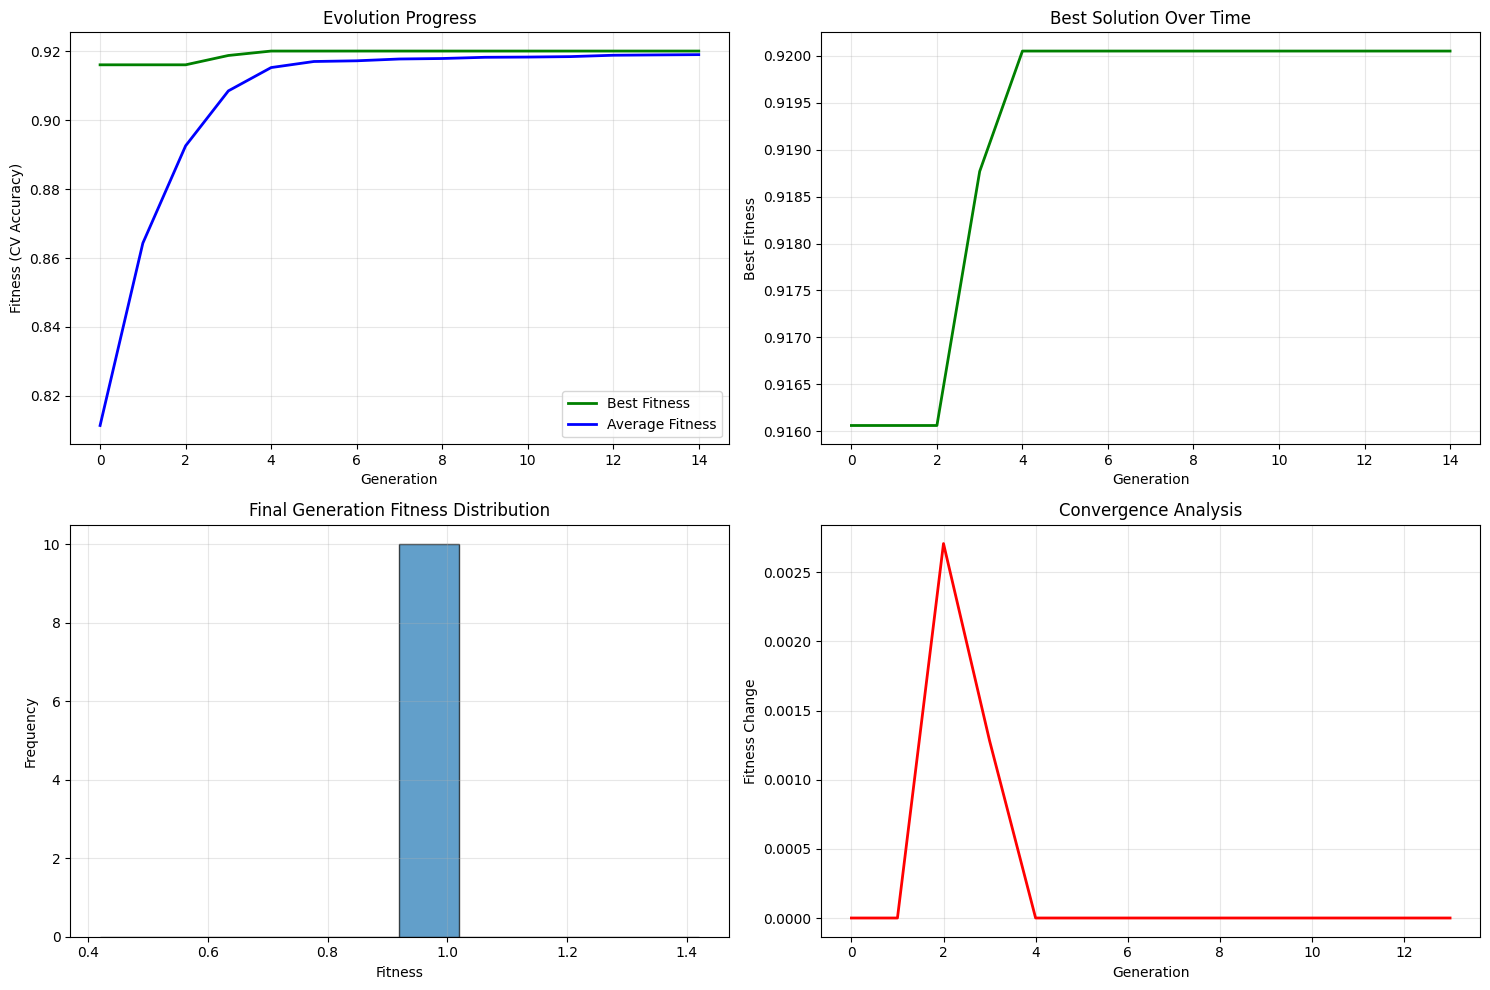

In [ ]:
# Try with 100 principal components
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Run GA with larger population/generations
ga = MLHyperparameterGA(
    X_train=X_train_pca,
    X_test=X_test_pca,
    y_train=y_train,
    y_test=y_test,
    model_type='random_forest',
    population_size=30,
    generations=15,
    mutation_rate=0.1,
    crossover_rate=0.8
)
best_params, best_fitness = ga.evolve()
best_model, test_accuracy = ga.evaluate_best_model(best_params)
ga.plot_evolution()

## Notes & Observations

- GA can efficiently search high-dimensional hyperparameter spaces.
- Population and generations affect convergence and solution quality.
- Mutation and crossover rates impact exploration/exploitation balance.
- Elitism helps retain the best solutions.
- GA can be extended to multi-objective optimization (accuracy + speed, etc.).
- Useful for ML models with expensive hyperparameter search.
- Performance is often comparable or better than grid/random search.